# Statistik

[<img src="bilder/scipy.png"  width="400" height="300"  title="SciPy">](https://scipy.org/)

In diesem Abschnitt werden wir die scipy-Bibliothek sowie andere Python-Funktionen verwenden, um unsere Datenexploration mit deskriptiven Statistiken zu formalisieren. 

In [1]:
# wir wollen unseren Pickle wieder lesen
import pickle

with open('df.pkl', 'rb') as file:
    df = pickle.load(file)

In [2]:
# wir importieren die notwendige Bibliotheken
import numpy as np
from scipy import stats
import pandas as pd

In [3]:
# mit dem Parameter "include", gibt uns die Methode "describe" auch Statistiken für kategorische Variablen
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,12364,7,J,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_urban,12364,2,False,8264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,12364.0,NaN,NaN,NaN,36.312763,15.121262,15.0,25.0,33.0,45.0,115.0
female,12364,2,True,6902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
married,12364,2,True,7989,NaN,NaN,NaN,NaN,NaN,NaN,NaN
religion,12364,5,X,5285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship_to_hh_head,12364,7,Head,5143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,12364.0,NaN,NaN,NaN,1.316241,0.905442,0.0,1.0,1.0,2.0,3.0
literacy,12364,2,True,7696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
can_add,12364,2,True,11241,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Das ist eigentlich ein neuer DataFrame. Er enthält nützliche Informationen, aber es gibt noch weitere Statistiken, die uns interessieren könnten. Warum also nicht die Beschreibungsmethode mit dem verbessern, was wir wollen?<br>
<br>
Wir werden eine Funktion erstellen die Korrelationskoeffizient, Kurtosis (Wölbung) und Skewness (Schiefe) für jede Variable gibt.

In [4]:
# die Funktion "weiter_stats" wird weitere Statistiken zu die describe Methode addieren
def weiter_stats(df):

    # temporäre variable mit den weiteren Statistiken
    _corr = pd.Series()
    _skew = pd.Series()
    _kurt = pd.Series()

    # für jeder Spalte im df, werden wir die Statistiken berechnen
    for col in df.columns:

        # abhängig von der Spalte, manche Statistiken sind nicht berechnenbar. 
        # falls das passiert, wir werden einfach ein NaN schreiben
        try:
            # Korrelationskoeffizient von jede Variable mit 'poverty_probability'
            _corr[col] = np.corrcoef(x = df[col], y = df['poverty_probability'])[0][1]
        except:
            _corr[col] = np.nan
        try:
            # Skewness
            _skew[col] = stats.skew(df[col])
        except:
            _skew[col] = np.nan
        try:
            # Kurtosis
            _kurt[col] = stats.kurtosis(df[col])
        except:
            _kurt[col] = np.nan

    # die Struktur von unserem neuen DataFrame ist der transponierter "describe"
    stats_df = df.describe(include = 'all').T

    # die andere Statistiken sind einfach dazu geschrieben
    stats_df['corrcoef'] = _corr
    stats_df['skew'] = _skew
    stats_df['kurtosis'] = _kurt

    # die Korrelationskoeffizient gibt uns die meinste Info über die Auswirkung in poverty_probability,
    # so wir werden der df darauf sortieren
    stats_df = stats_df.sort_values('corrcoef')

    return stats_df

In [5]:
stats_df = weiter_stats(df)

In [6]:
stats_df

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,corrcoef,skew,kurtosis
education_level,12364.0,NaN,NaN,NaN,1.316241,0.905442,0.0,1.0,1.0,2.0,3.0,-0.345487,0.111063,-0.820432
is_urban,12364,2,False,8264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.289287,0.715358,-1.488262
phone_technology,12364.0,NaN,NaN,NaN,1.216677,1.094001,0.0,0.0,1.0,2.0,3.0,-0.287777,0.307103,-1.252435
can_use_internet,12364,2,False,9247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.282023,1.141804,-0.696283
can_text,12364,2,False,6261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.259108,0.02556,-1.999347
num_financial_activities_last_year,12364.0,NaN,NaN,NaN,1.583064,2.051739,0.0,0.0,1.0,3.0,10.0,-0.257001,1.414739,1.486982
phone_ownership,12364.0,NaN,NaN,NaN,1.475008,0.772687,0.0,1.0,2.0,2.0,2.0,-0.249417,-1.046895,-0.52798
formal_savings,12364,2,False,8650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.249417,0.870856,-1.241611
advanced_phone_use,12364,2,False,8675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.246281,0.88138,-1.223169
active_bank_user,12364,2,False,9809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.243165,1.449004,0.099614


### Vorsicht vor dem Datasaurus!!!

Aber wie wir wissen, bringen deskriptive Statistiken uns nur so weit. Sie bieten uns keinen Verfahrensweg, um zu überprüfen, welche Variablen am wichtigsten sind, und ermöglichen es uns nicht, ein Modell zu erstellen. Darüber hinaus können sie über die Natur der zugrunde liegenden Daten irreführend sein.

[<img src="bilder/datasaurus.png"  width="400" height="300"  title="Datasaurus!">](https://www.research.autodesk.com/app/uploads/2023/03/DinoSequential-1.gif)

## 2 - OLS und Statistische Tests
<br>

[<img src="bilder/statsmodels.png"  width="400" height="300"  title="StatsModels">](https://www.statsmodels.org/stable/index.html)

**Statsmodels** ist eine der meistgenutzten statistischen Bibliotheken in Python. Sie bietet eine breite Palette von statistischen Modellen und Funktionen zur Analyse von Daten. Mit Statsmodels können Benutzer **lineare Regression**, **Zeitreihenanalyse**, **generalisierte lineare Modelle**, **robuste Schätzungen** und vieles mehr durchführen. Darüber hinaus ermöglicht es detaillierte **statistische Tests und Diagnosen**, um die Modellierungsergebnisse zu validieren und die Robustheit der Analysen zu überprüfen. Die Bibliothek wird in verschiedenen wissenschaftlichen Disziplinen sowie in der Wirtschafts- und Finanzanalyse eingesetzt und hat sich als leistungsfähiges Werkzeug für Datenanalysten und Forscher etabliert.

In [7]:
import statsmodels.api as sm

In [8]:
# die Methoden in Statsmodels funktionieren nicht gut mit Booleans, 
# aber wir können es einfach zu Ganzzahlen (0 oder 1) wandeln
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

In [9]:
stats_df

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,corrcoef,skew,kurtosis
education_level,12364.0,NaN,NaN,NaN,1.316241,0.905442,0.0,1.0,1.0,2.0,3.0,-0.345487,0.111063,-0.820432
is_urban,12364,2,False,8264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.289287,0.715358,-1.488262
phone_technology,12364.0,NaN,NaN,NaN,1.216677,1.094001,0.0,0.0,1.0,2.0,3.0,-0.287777,0.307103,-1.252435
can_use_internet,12364,2,False,9247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.282023,1.141804,-0.696283
can_text,12364,2,False,6261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.259108,0.02556,-1.999347
num_financial_activities_last_year,12364.0,NaN,NaN,NaN,1.583064,2.051739,0.0,0.0,1.0,3.0,10.0,-0.257001,1.414739,1.486982
phone_ownership,12364.0,NaN,NaN,NaN,1.475008,0.772687,0.0,1.0,2.0,2.0,2.0,-0.249417,-1.046895,-0.52798
formal_savings,12364,2,False,8650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.249417,0.870856,-1.241611
advanced_phone_use,12364,2,False,8675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.246281,0.88138,-1.223169
active_bank_user,12364,2,False,9809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.243165,1.449004,0.099614


In [10]:
# um die Spalte Country zu nutzen, wir mussen es zu dummy Spalten wandeln.
# dafür hat Pandas die beste Methode
df.merge(pd.get_dummies(df['country'], prefix = 'country_'),left_index=True, right_index=True)

,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,can_add,...,num_financial_activities_last_year,gender,poverty_probability,country__A,country__C,country__D,country__F,country__G,country__I,country__J
row_id,,,,,,,,,,,,,,,,,,,,,
0.0,C,0,18,1,1,P,Other,1.0,1,1,...,1,female,0.515,False,True,False,False,False,False,False
1.0,C,1,30,1,1,P,Other,1.0,1,1,...,0,female,0.981,False,True,False,False,False,False,False
2.0,A,0,20,1,1,Q,Spouse,1.0,1,1,...,0,female,0.982,True,False,False,False,False,False,False
3.0,A,0,61,0,1,Q,Head,0.0,0,1,...,0,male,0.879,True,False,False,False,False,False,False
4.0,D,0,26,1,1,X,Spouse,1.0,1,0,...,3,female,0.796,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595.0,C,1,50,0,1,P,Head,1.0,1,1,...,1,male,0.990,False,True,False,False,False,False,False
12596.0,D,0,90,0,0,O,Head,0.0,1,1,...,0,male,0.950,False,False,True,False,False,False,False
12597.0,J,0,52,1,0,X,Head,1.0,0,1,...,0,female,0.342,False,False,False,False,False,False,True


Um ein OLS-Modell zu bauen, mussen wir die folgende Schritte folgen:<br>
$y_{n} = \sum_{k}^{i=0}\beta_{i}x_{ni} + \varepsilon_{n}$


In [11]:
# definieren wir die Matrix mit den gewählten unabhängigen Variablen (X)
X= df[['education_level','is_urban','phone_technology','can_use_internet']]

# um eine Konstante hinzuzufügen, verwenden wir den folgenden Befehl
X = sm.add_constant(X) 

# und jetzt sind wir bereit ein OLS Model zu erstellen, mit dem Befehl sm.OLS(y,X)
# das ist ein Objekt (model_OLS), von einer Klasse (sm.OLS) erstellt
model_OLS = sm.OLS(df['poverty_probability'], X)

# wir nutzen die "fit" Methode, damit die Parameter (ß) berechnet werden
model_OLS = model_OLS.fit()

# und wir können die Methode "summary" abrufen, um die Ergebnisse zu sehen
print(model_OLS.summary())


                             OLS Regression Results                            
Dep. Variable:     poverty_probability   R-squared:                       0.188
Model:                             OLS   Adj. R-squared:                  0.187
Method:                  Least Squares   F-statistic:                     713.4
Date:                 Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                         12:54:38   Log-Likelihood:                -1033.7
No. Observations:                12364   AIC:                             2077.
Df Residuals:                    12359   BIC:                             2115.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7894   

Es ist eine gute Idee, sich die **Regression Ergebniss** sowie die **Residuen** des Modells anzuschauen


In [39]:
# wir importieren unsere beliebten Diagramm-Bibliotheken
import seaborn as sns
import matplotlib.pyplot as plt

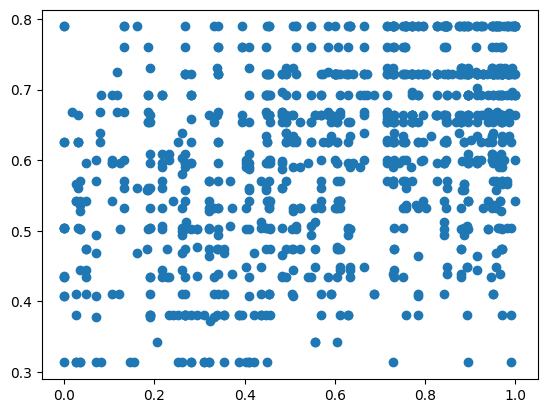

In [60]:
# wir können die Modellergebnisse mit den realten Werten vergleichen
plt.scatter(df['poverty_probability'].iloc[:1000],model_OLS.predict(X).iloc[:1000]);

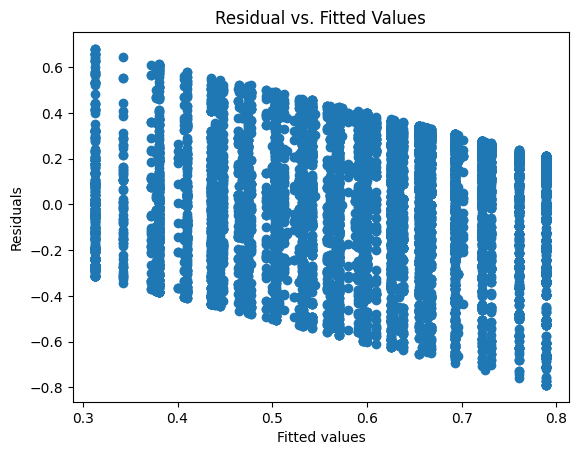

In [36]:
# wir sehen einen klaren Trend in die Residuen
plt.scatter(model_OLS.fittedvalues, model_OLS.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual vs. Fitted Values')
plt.show()

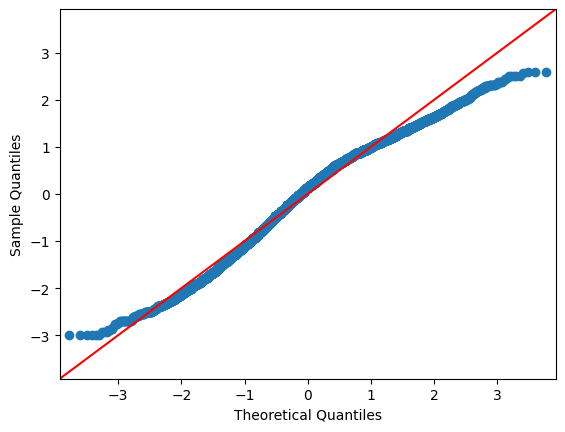

In [37]:
# statsmodel bietet, z.B. die QQ Diagramm 
fig = sm.qqplot(model_OLS.resid, fit=True, line='45')

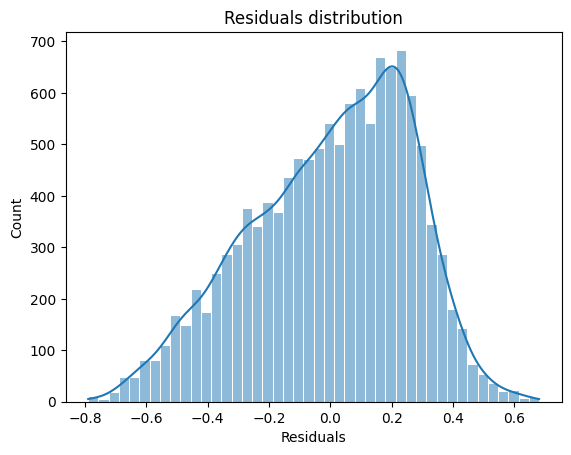

In [38]:
# und wir können auch ein Histogramm machen
sns.histplot(model_OLS.resid, kde=True, edgecolor='w');
plt.xlabel('Residuals')
plt.title('Residuals distribution');

/home/jsemeano/.pyenv/versions/3.10.6/envs/OpenRent/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


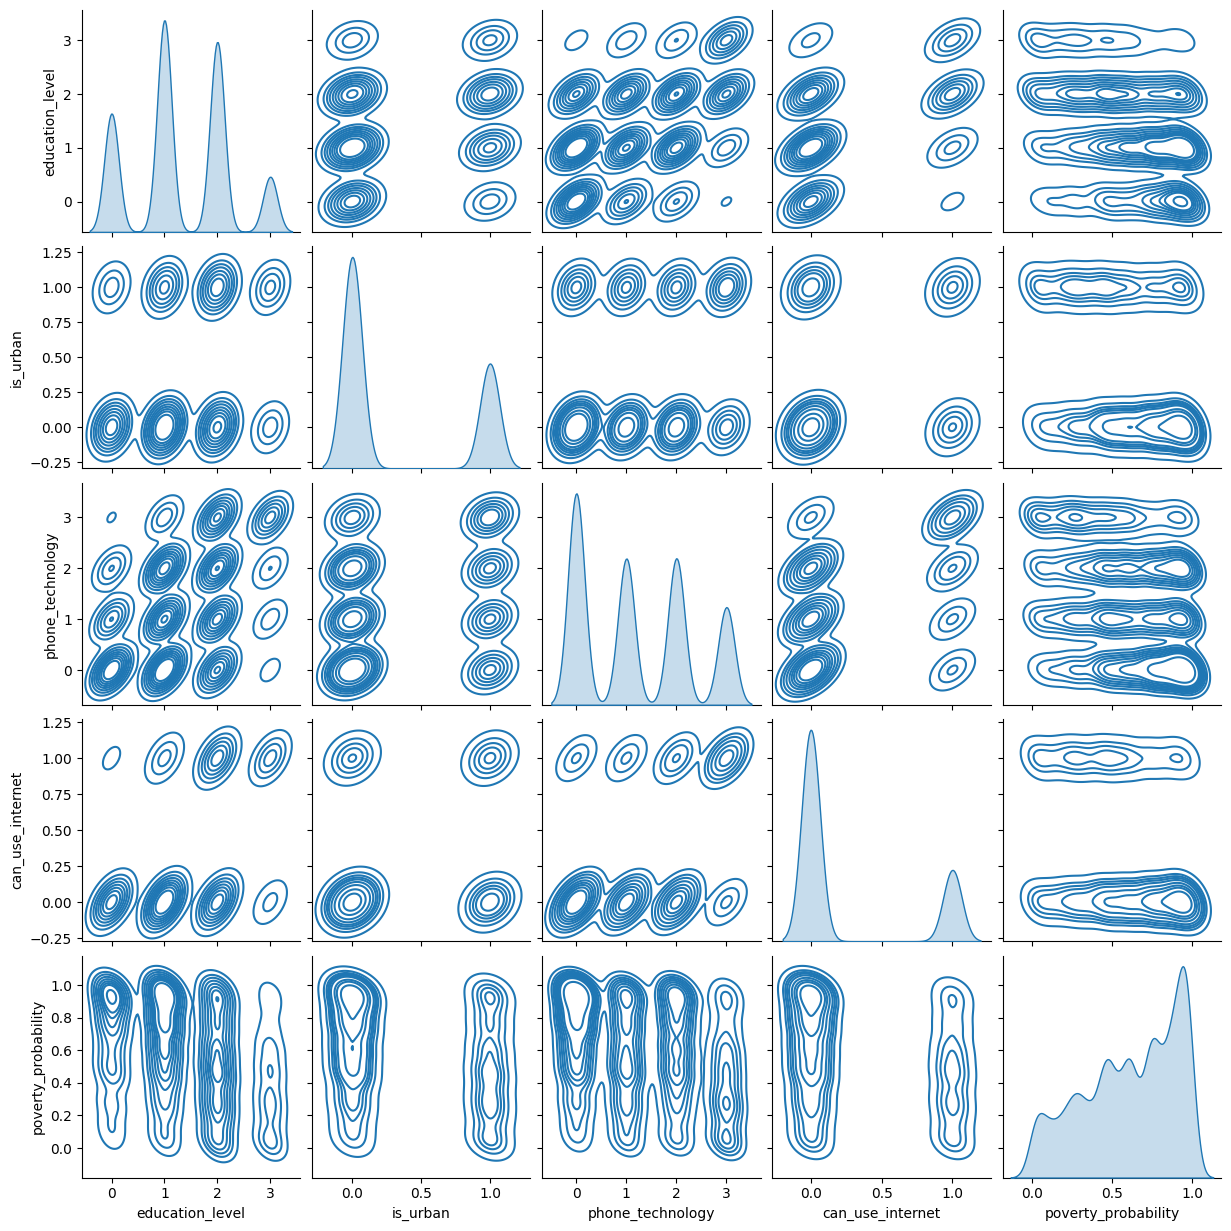

In [20]:
# und, weil nur wir wenige Variable nutzen, können wir auch das Seaborn Pairplot abrufen
sns.pairplot(data = X.drop(columns='const').merge(df['poverty_probability'], 
                                                  left_index=True, 
                                                  right_index=True), 
             kind='kde');

Wir haben sehr viel geschaft:
- Daten gelesen und vorgearbeitet,
- ein OLS Model ergestellt und die passende Parameter (ß) berechnet,
- das Modell verwendet, um eine Vorhersage zu machen und mit den tatsächlichen Werten zu vergleichen,
- Informationen über die Modellanpassung gesammelt

<br>

Aber stellt ihr euch vor, wir sind in einer Situation, in der wir regelmäßig Dateien desselben Typs erhalten und dieselben Befehle wiederholen möchten. Wir möchten nicht, dass alle Teile unseres Codes überall im Notebook verteilt sind. Stattdessen sollten wir eine **Klasse** erstellen, in der wir die verwendeten **Daten als Attribute** speichern und die verschiedenen **Methoden** definieren können, die wir benötigen, um die **Daten zu behandeln**, das **Modell zu erstellen** und zu verwenden sowie dessen **Gültigkeit zu überprüfen**. Das ist es, was wir als nächstes tun werden.
 

# 3 - Erstellung einer Modellclass

Unsere Klasse muss:

- die Namen der Dateien entgegennehmen, die die Daten (Variablen und Ziel) enthalten,
- die deskriptiven Statistiken und Diagramme erstellen, die den Datensatz beschreiben,
- entscheiden, welche Variablen im Modell verwendet werden sollen,
- das Modell erstellen,
- die Modellanpassung überprüfen,
- das Modell zur Vorhersage verwenden.

In [61]:
class model_poverty_prob:

    def __init__(self, data_str, target_str):
        self.data_str = data_str
        self.target_str = target_str
        
    # DataFrame mit einer feinere Regel füllen
    # APPLY FUNCTION
    def app_func(self,row):
        """
        Lineare Interpolation von NaN zwischen 2 vorhanden Werte 
        """
    
        # kontrollieren ob NaN in der Spalte sind
        if row.isnull().sum() > 0:
            _row = row # temporär Kopie von der Spalte
            null_indices = _row[_row.isna()].index # Indexe von NaN
    
            first_index = null_indices[0]-1 # Index vom letzten Wert vor NaNs
            last_index = null_indices[-1]+1 # Index vom ertsten Wert nach NaNs
    
            # Series mit den interpolierten Daten sowie die Indexe von NaNs
            null_substitution = pd.Series(data  = [_row[first_index] + i*(_row[last_index]-_row[first_index])/(len(null_indices)+1) for i in range(1,len(null_indices)+1)],
                                       index = null_indices) 
    
            # Überschreiben von NaN in der temporär Kopie der Spalte mit den interpolierten Werte
            _row[null_indices] = null_substitution
    
            # Rückgabe vom gefüllte temporär Kopie der Spalte
            return _row
        # falls keine NaN, geben wir die gleiche Spalte zurück 
        else:
            return row
            
    def prep_dataset(self):
        self.data_df = pd.read_excel(f'../{self.data_str}')
        self.target_df = pd.read_excel(f'../{self.target_str}',
                        index_col= 0)

        self.data_df['gender'] = self.data_df['female'].map({True: 'female', False: 'male'})

        self.data_df['row_id'] = self.app_func(self.data_df['row_id'])

        self.data_df = self.data_df.set_index('row_id')

        self.data_df = self.data_df.merge(pd.get_dummies(self.data_df['country'], prefix = 'country_'),left_index=True, right_index=True)

        self.data_df = self.data_df.merge(self.target_df, left_index=True, right_index=True)

        for col in self.data_df.columns:
            if self.data_df[col].dtype == 'bool':
                self.data_df[col] = self.data_df[col].astype(int)

    def describe_dataset(self):

        self.data_df.info()
        
        _corr = pd.Series()
        _skew = pd.Series()
        _kurt = pd.Series()
    
        for col in self.data_df.columns:
            try:
                _corr[col] = np.corrcoef(x = df[col], y = self.data_df['poverty_probability'])[0][1]
            except:
                _corr[col] = np.nan
            try:
                _skew[col] = stats.skew(self.data_df[col])
            except:
                _skew[col] = np.nan
            try:
                _kurt[col] = stats.kurtosis(self.data_df[col])
            except:
                _kurt[col] = np.nan
    
        stats_df = self.data_df.describe(include = 'all').T
        stats_df['corrcoef'] = _corr
        stats_df['skew'] = _skew
        stats_df['kurtosis'] = _kurt

        self.data_df_describe = stats_df

    def drop_cols(self,col_list):

        self.data_df = self.data_df.drop(columns=col_list)
    
    def drop_na(self,col_list):
        self.data_df = self.data_df.dropna(subset = 'education_level')

    def OLS_mod(self,col_list):
        
        self.X_OLS= self.data_df[col_list]#,'can_text','num_financial_activities_last_year','age'

        self.X_OLS = sm.add_constant(self.X_OLS) # Adding a constant to include an intercept in the model
        self.model_OLS = sm.OLS(self.data_df['poverty_probability'], self.X_OLS)
        self.model_OLS = self.model_OLS.fit()
        print(self.model_OLS.summary())

    def OLS_mod_pred(self,col_list):
        
        return self.model_OLS.predict(self.data_df[col_list])

    def OLS_charts(self):

        fig = plt.figure(figsize=(10,20))
        fig = sm.graphics.plot_partregress_grid(mod_.model_OLS, fig=fig)
        plt.show()


        fig, axs = plt.subplots(1,3,figsize=(20,10))

        
        # QQ plot for normality
        sm.qqplot(self.model_OLS.resid, fit=True, line='45',ax=axs[0])
        axs[0].set_title('QQ plot for normality')

        sns.histplot(self.model_OLS.resid, kde=True, edgecolor='w', ax=axs[1]);
        axs[1].set_xlabel('Residuals')
        axs[1].set_title('Residuals distribution')
        
        axs[2].scatter(self.data_df['poverty_probability'].iloc[:1000],self.model_OLS.predict(self.X_OLS).iloc[:1000]);
        # sns.histplot(self.model_OLS.resid, kde=True, edgecolor='w', ax=axs[1]);
        axs[2].set_xlabel('Real target')
        axs[2].set_ylabel('Predicted target')
        axs[2].set_title('Real vs predicted target')

    def OLS_pairplot(self):
        sns.pairplot(data = self.X_OLS.drop(columns='const').merge(self.data_df['poverty_probability'], left_index=True, right_index=True), kind='kde')
        


In [62]:
train_data_str = 'train_values.xlsx'
target_data_str = 'train_labels.xlsx'

In [63]:
mod_ = model_poverty_prob(train_data_str, target_data_str)

In [64]:
mod_.prep_dataset()

/tmp/ipykernel_17856/3086313605.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _row[null_indices] = null_substitution


In [65]:
mod_.data_df.columns

Index(['country', 'is_urban', 'age', 'female', 'married', 'religion',
       'relationship_to_hh_head', 'education_level', 'literacy', 'can_add',
       'can_divide', 'can_calc_percents', 'can_calc_compounding',
       'employed_last_year', 'employment_category_last_year',
       'employment_type_last_year', 'share_hh_income_provided',
       'income_ag_livestock_last_year', 'income_friends_family_last_year',
       'income_government_last_year', 'income_own_business_last_year',
       'income_private_sector_last_year', 'income_public_sector_last_year',
       'num_times_borrowed_last_year', 'borrowing_recency', 'formal_savings',
       'informal_savings', 'cash_property_savings', 'has_insurance',
       'has_investment', 'bank_interest_rate', 'mm_interest_rate',
       'mfi_interest_rate', 'other_fsp_interest_rate', 'num_shocks_last_year',
       'avg_shock_strength_last_year', 'borrowed_for_emergency_last_year',
       'borrowed_for_daily_expenses_last_year',
       'borrowed_for_hom

In [66]:
mod_.describe_dataset()

<class 'pandas.core.frame.DataFrame'>
Index: 12600 entries, 0.0 to 12599.0
Data columns (total 67 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country                                12600 non-null  object 
 1   is_urban                               12600 non-null  int64  
 2   age                                    12600 non-null  int64  
 3   female                                 12600 non-null  int64  
 4   married                                12600 non-null  int64  
 5   religion                               12600 non-null  object 
 6   relationship_to_hh_head                12600 non-null  object 
 7   education_level                        12364 non-null  float64
 8   literacy                               12600 non-null  int64  
 9   can_add                                12600 non-null  int64  
 10  can_divide                             12600 non-null  int64  
 11  can

In [27]:
mod_.data_df_describe

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,corrcoef,skew,kurtosis
country,12600,7,J,1843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_urban,12600.0,NaN,NaN,NaN,0.328571,0.469712,0.0,0.0,0.0,1.0,1.0,NaN,0.729959,-1.46716
age,12600.0,NaN,NaN,NaN,36.280714,15.145945,15.0,25.0,33.0,45.0,115.0,NaN,0.894111,0.390595
female,12600.0,NaN,NaN,NaN,0.557778,0.49667,0.0,0.0,1.0,1.0,1.0,NaN,-0.23267,-1.945865
married,12600.0,NaN,NaN,NaN,0.648571,0.477435,0.0,0.0,1.0,1.0,1.0,NaN,-0.622398,-1.612621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
country__F,12600.0,NaN,NaN,NaN,0.140397,0.347412,0.0,0.0,0.0,0.0,1.0,NaN,2.070265,2.285996
country__G,12600.0,NaN,NaN,NaN,0.143254,0.350346,0.0,0.0,0.0,0.0,1.0,NaN,2.036619,2.147816
country__I,12600.0,NaN,NaN,NaN,0.14381,0.35091,0.0,0.0,0.0,0.0,1.0,NaN,2.030174,2.121607
country__J,12600.0,NaN,NaN,NaN,0.14627,0.353391,0.0,0.0,0.0,0.0,1.0,NaN,2.002001,2.00801


In [28]:
mod_.drop_cols(['bank_interest_rate', 'mm_interest_rate', 'mfi_interest_rate', 'other_fsp_interest_rate'])

In [29]:
mod_.data_df.columns

Index(['country', 'is_urban', 'age', 'female', 'married', 'religion',
       'relationship_to_hh_head', 'education_level', 'literacy', 'can_add',
       'can_divide', 'can_calc_percents', 'can_calc_compounding',
       'employed_last_year', 'employment_category_last_year',
       'employment_type_last_year', 'share_hh_income_provided',
       'income_ag_livestock_last_year', 'income_friends_family_last_year',
       'income_government_last_year', 'income_own_business_last_year',
       'income_private_sector_last_year', 'income_public_sector_last_year',
       'num_times_borrowed_last_year', 'borrowing_recency', 'formal_savings',
       'informal_savings', 'cash_property_savings', 'has_insurance',
       'has_investment', 'num_shocks_last_year',
       'avg_shock_strength_last_year', 'borrowed_for_emergency_last_year',
       'borrowed_for_daily_expenses_last_year',
       'borrowed_for_home_or_biz_last_year', 'phone_technology', 'can_call',
       'can_text', 'can_use_internet', 'can_

In [30]:
mod_.drop_na(['education_level'])

In [31]:
mod_.OLS_mod(['education_level','is_urban','phone_technology','can_use_internet','active_bank_user', 'country__A', 'country__C',
       'country__D',  'country__G','female'])


                             OLS Regression Results                            
Dep. Variable:     poverty_probability   R-squared:                       0.313
Model:                             OLS   Adj. R-squared:                  0.313
Method:                  Least Squares   F-statistic:                     563.7
Date:                 Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                         13:07:12   Log-Likelihood:                 5.9938
No. Observations:                12364   AIC:                             10.01
Df Residuals:                    12353   BIC:                             91.66
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7058   

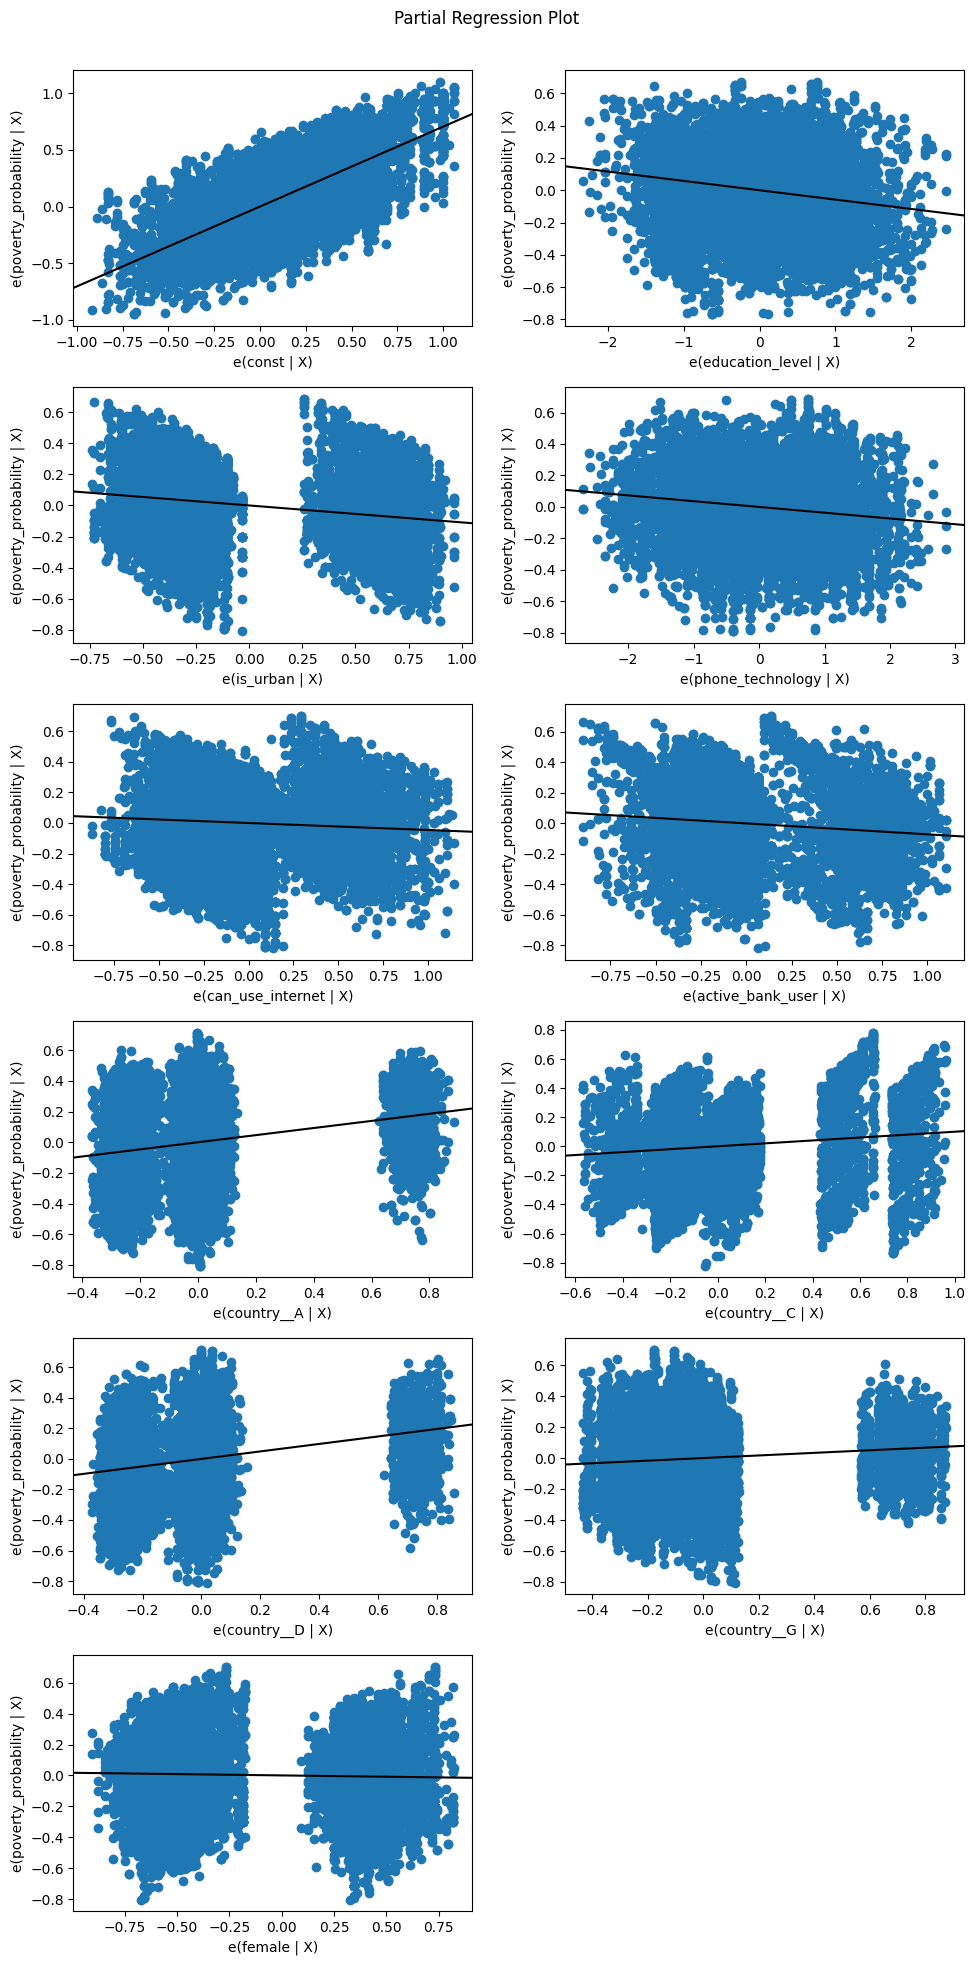

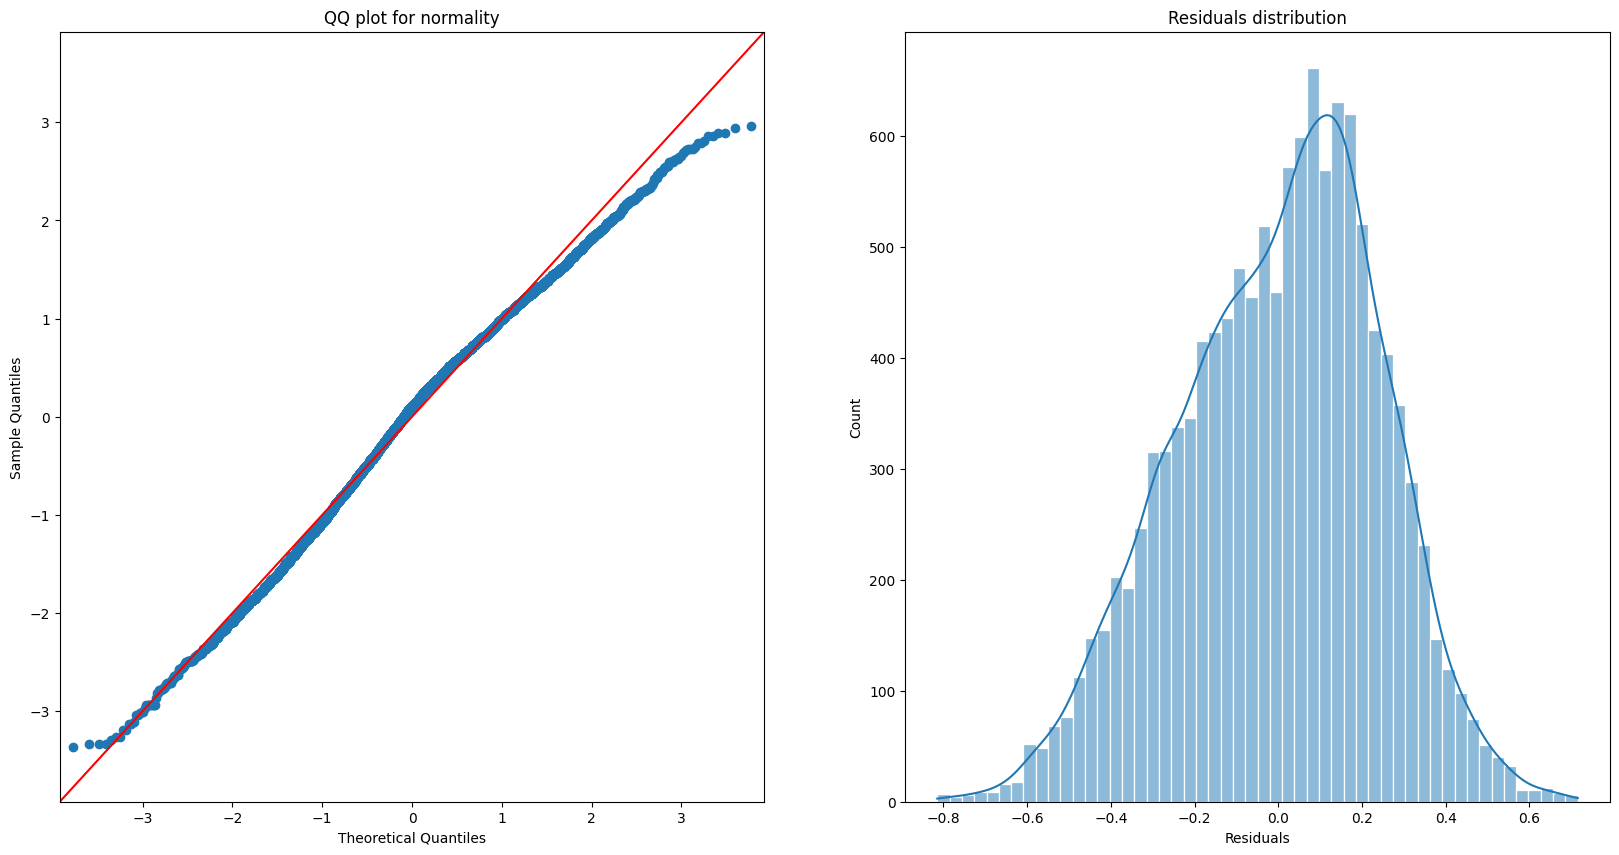

In [32]:
mod_.OLS_charts()

In [ ]:
mod_.OLS_pairplot()

In [ ]:
with open('mod_OLS.pkl', 'wb') as file:
    pickle.dump(mod_, file)